<a href="https://colab.research.google.com/github/AgustinSiben/AprMaq/blob/main/Trabajo_practico_3_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico 3

## Creo dos dataframes

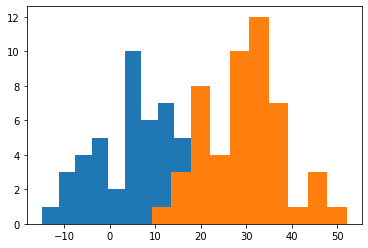

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Creo dos dataframes de con distribución normal y distintas caracteristicas
muA, sigmaA = 5, 10 # Media y desviación estandar
muB, sigmaB = 30,10
n = 50 #Cantidad de valores
a = np.random.normal(muA, sigmaA, n)
b = np.random.normal(muB, sigmaB, n)

a = pd.DataFrame({'Etiqueta' : 'A', 'Val.': a})
b = pd.DataFrame({'Etiqueta' : 'B', 'Val.': b})
plt.hist(a['Val.'])
plt.hist(b['Val.'])
df = a.append(b, ignore_index=True)
#Ordeno el dataframe
df.sort_values('Val.', inplace=True, ignore_index=True)



##Agrego una librería para tener un clasificador

In [107]:
from sklearn import neighbors

cantidadDeVecinos = 1
x, y = df['Val.'].values, df['Etiqueta'].values
knn = neighbors.KNeighborsClassifier(n_neighbors = cantidadDeVecinos)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
knn.fit(x ,y)

#Hago una predicción de prueba
print(knn.predict(10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


ValueError: ignored